In [6]:
!pip install -Uqq fastbook

In [7]:
from fastbook import *
from fastai.vision.widgets import *

In [8]:
file_dict = {'teddy':'teddy_bear.txt', 
             'grizzly':'grizzly_bear.txt', 
             'polar':'polar_bear.txt', 
             'black':'black_bear.txt'}

In [9]:
for folder, link in file_dict.items():
  path = Path('bears')
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)
  download_images(dest=dest, url_file=path/link)

In [ ]:
bear_types = 'grizzly', 'black', 'teddy', 'polar'

In [10]:
fns = get_image_files(path)
fns

(#1288) [Path('bears/grizzly/00000100.jpg'),Path('bears/grizzly/00000063.jpg'),Path('bears/grizzly/00000240.jpg'),Path('bears/grizzly/00000367.jpg'),Path('bears/grizzly/00000251.jpg'),Path('bears/grizzly/00000029.jpg'),Path('bears/grizzly/00000108.jpg'),Path('bears/grizzly/00000212.jpg'),Path('bears/grizzly/00000320.jpg'),Path('bears/grizzly/00000123.jpg')...]

In [11]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
failed.map(Path.unlink)

(#0) []

In [12]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.25, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [13]:
dls = bears.dataloaders(path)

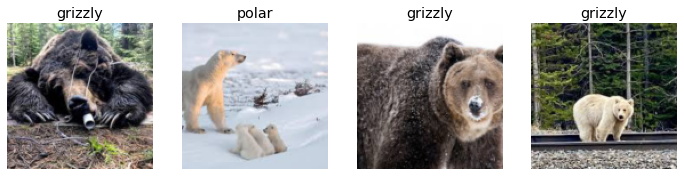

In [14]:
dls.valid.show_batch(max_n=4, nrows=1)

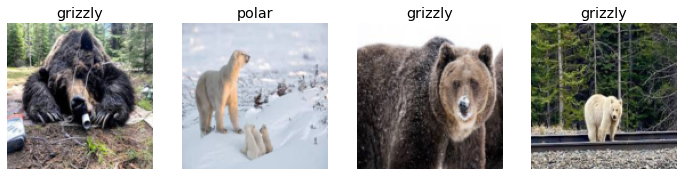

In [15]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

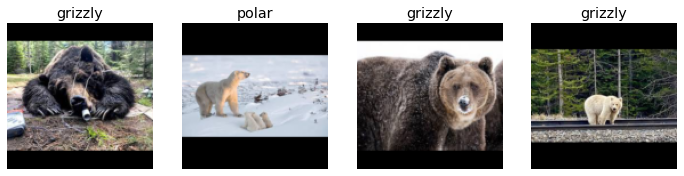

In [16]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [17]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = bears.dataloaders(path)

In [18]:
model = cnn_learner(dls, resnet18, metrics=error_rate)
model.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.149126,0.360763,0.083851,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.275193,0.252770,0.074534,00:06
1,0.216530,0.329650,0.065217,00:06
2,0.170036,0.255044,0.055901,00:06
3,0.141517,0.252911,0.052795,00:06


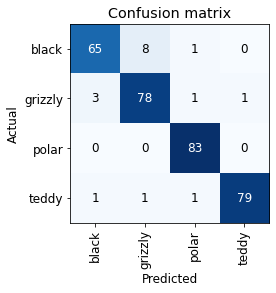

In [19]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

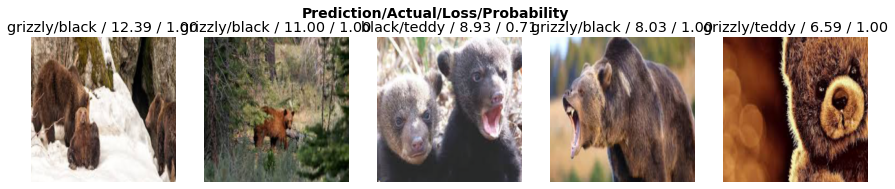

In [20]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
# cleaner = ImageClassifierCleaner(model)
# cleaner

In [ ]:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)